In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from performance_measures import performance_measures
import timeit
from imblearn.over_sampling import RandomOverSampler

In [2]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Machines
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighnors
from sklearn.naive_bayes import GaussianNB # Naive Bayes 
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest  
from sklearn.ensemble import AdaBoostClassifier # Ada Boost
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boost
from xgboost import XGBClassifier # 

In [3]:
import seaborn as sns

In [4]:
FetalHealth = pd.read_csv(r"source\fetal_health.csv")

In [5]:
FetalHealth.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
FetalHealth.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [7]:
FetalHealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Classes : 
1. Normal
2. Suspect
3. Pathological

Analysis consists of :

1. Count plot
2. Correlation heat map

C:\Users\Santhosh\AppData\Local\Temp\ipykernel_17484\2249499371.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = FetalHealth, x = "fetal_health", palette = colours)


Text(0.5, 1.0, 'Class frequencies of original dataset')

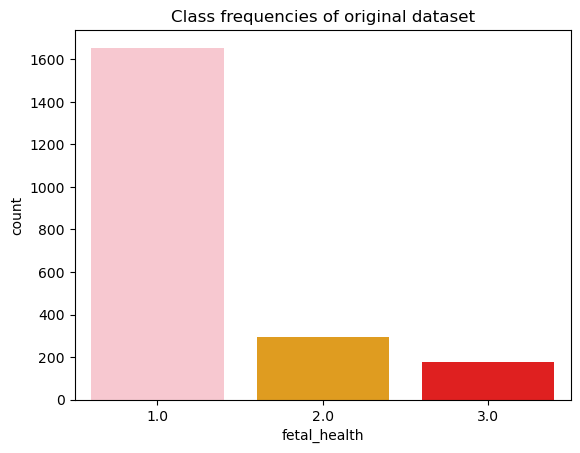

In [8]:
colours = ["pink","orange", "red"]
sns.countplot(data = FetalHealth, x = "fetal_health", palette = colours)
plt.title("Class frequencies of original dataset")

<Axes: >

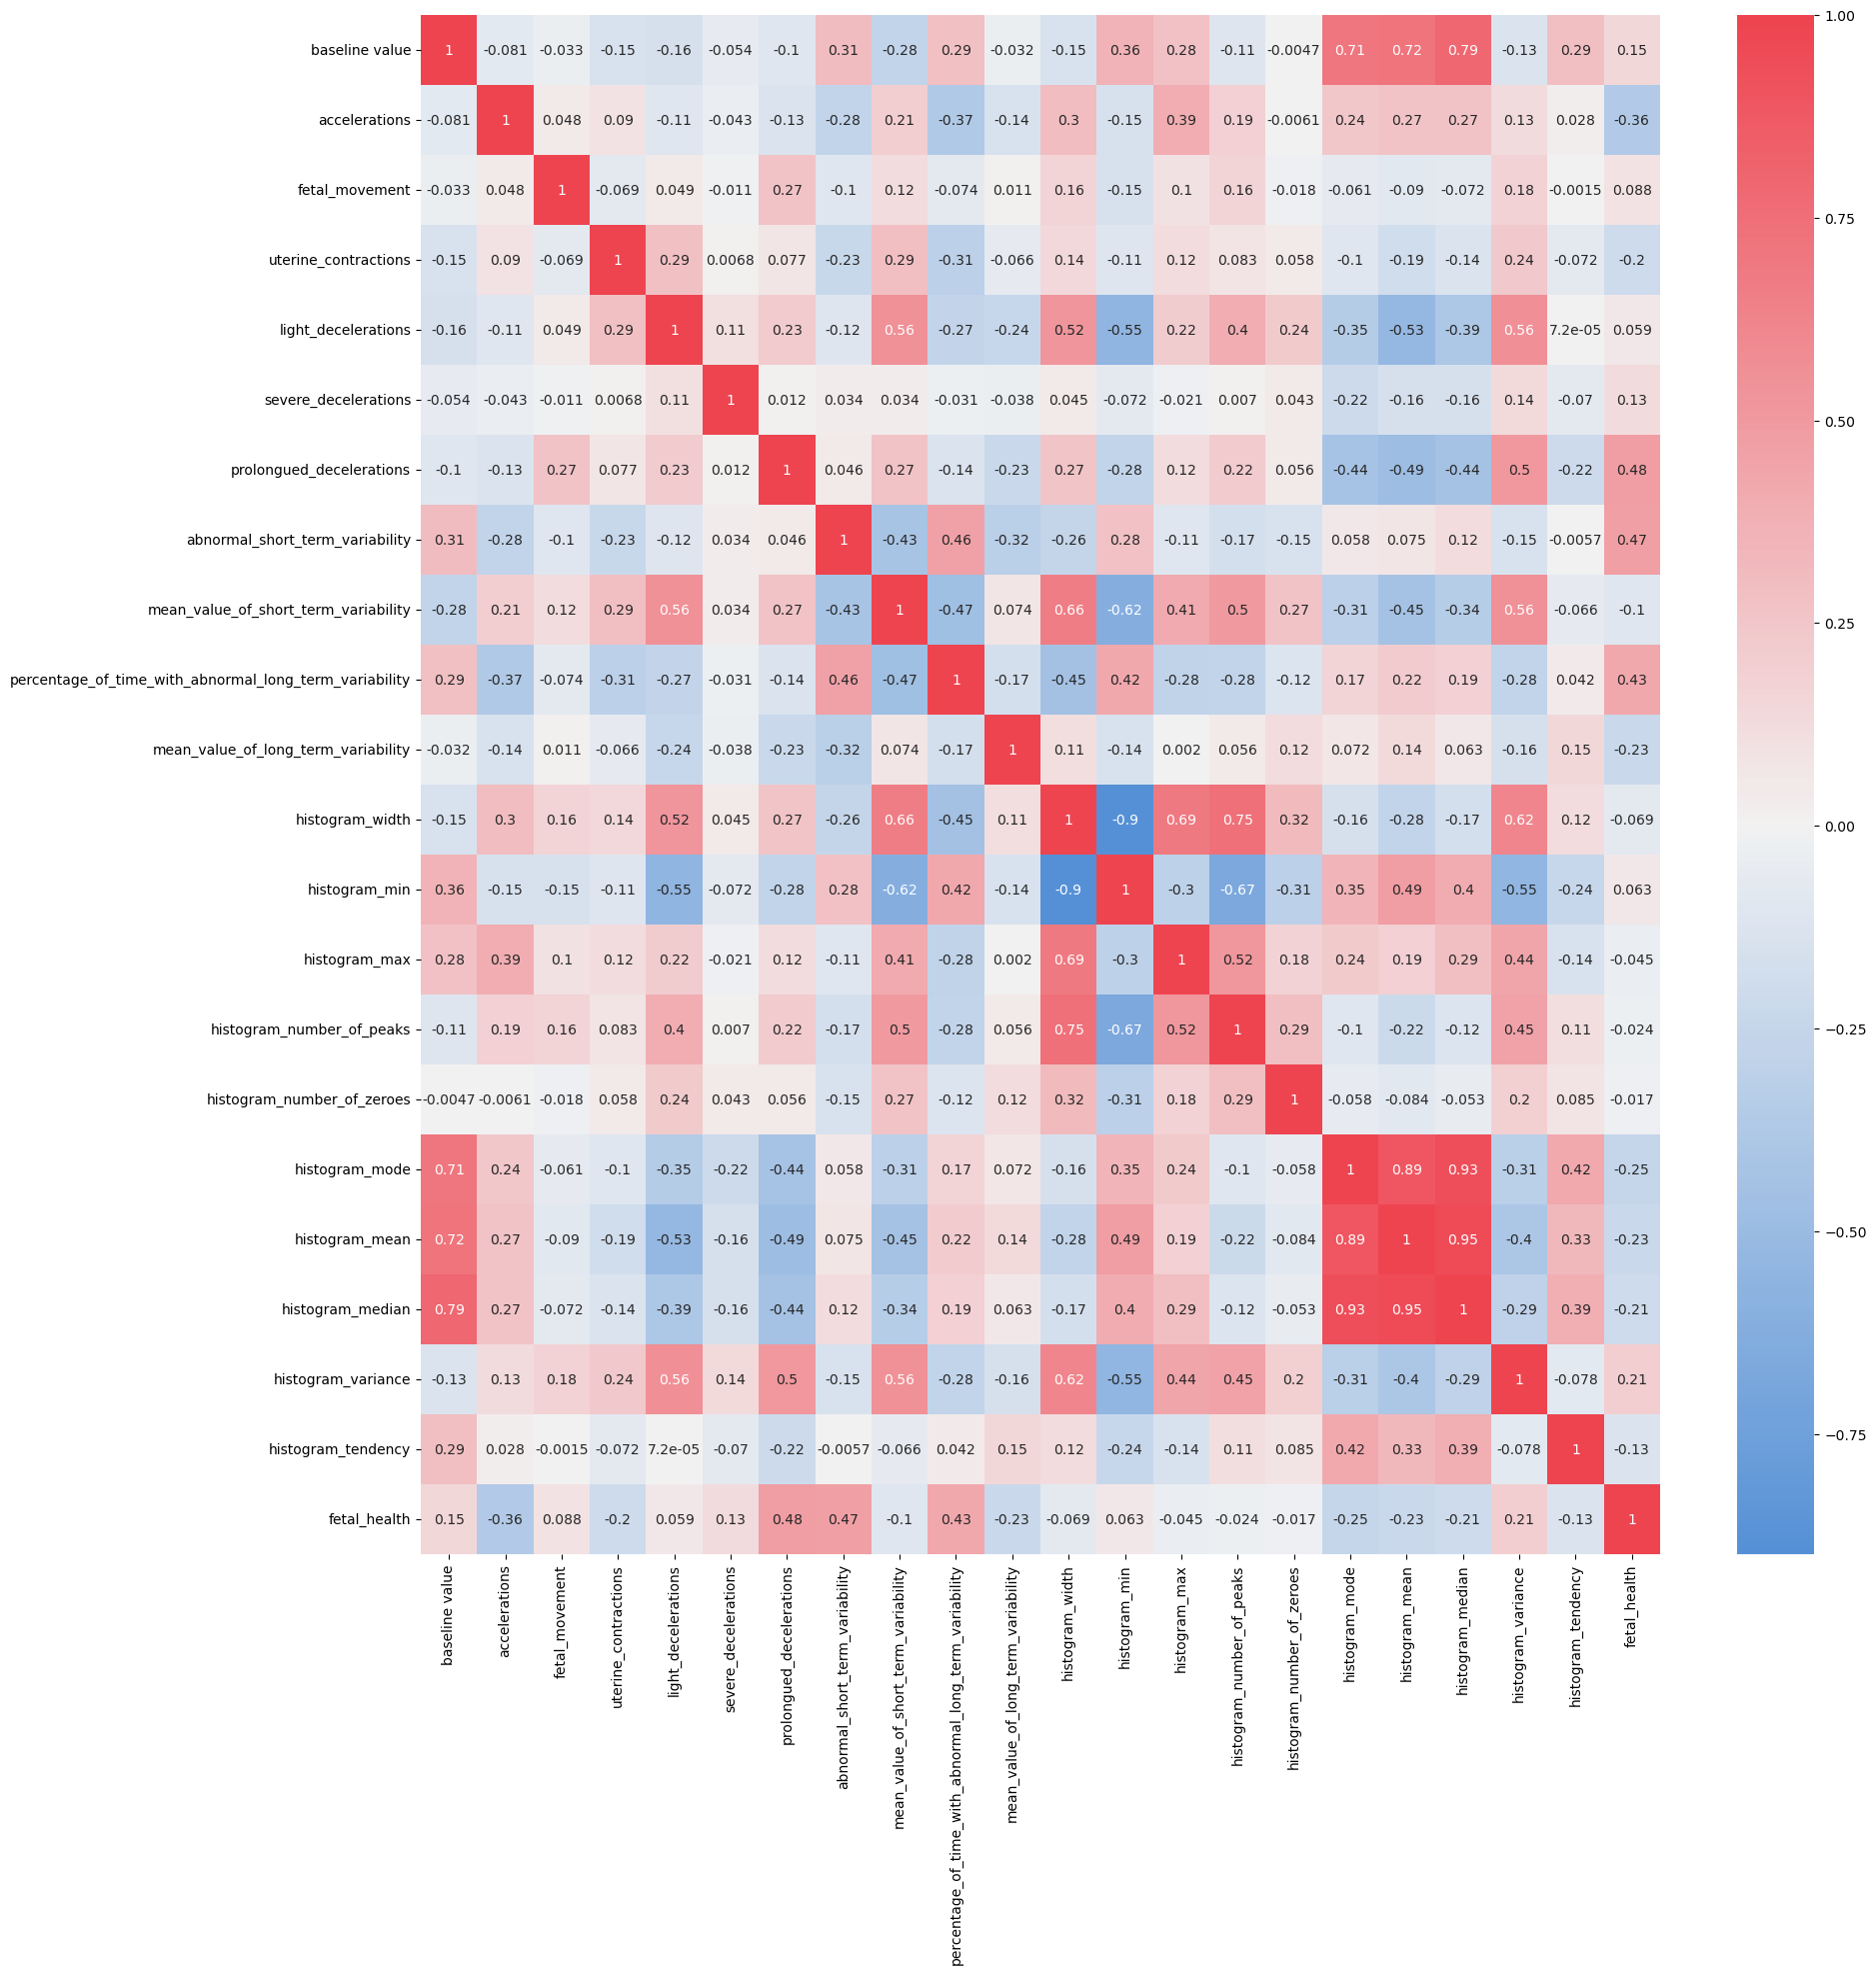

In [9]:
corrmat= FetalHealth.corr()
plt.figure(figsize=(20,20))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

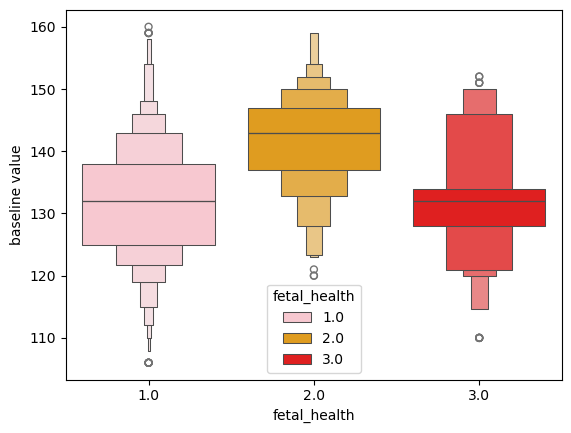

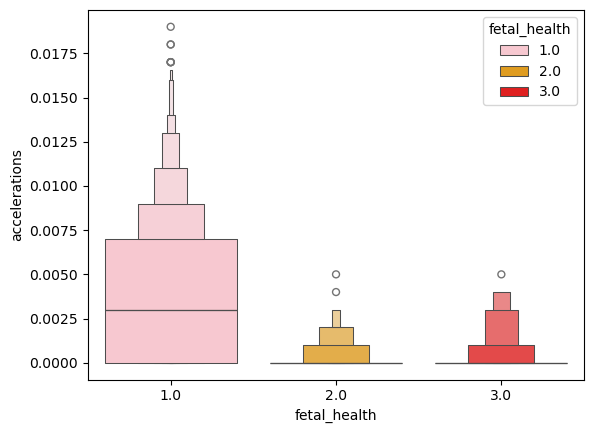

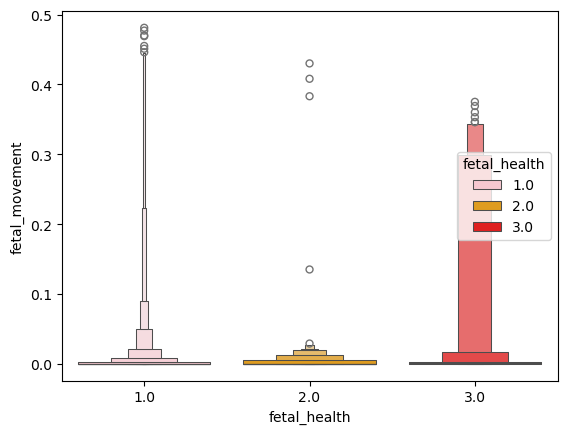

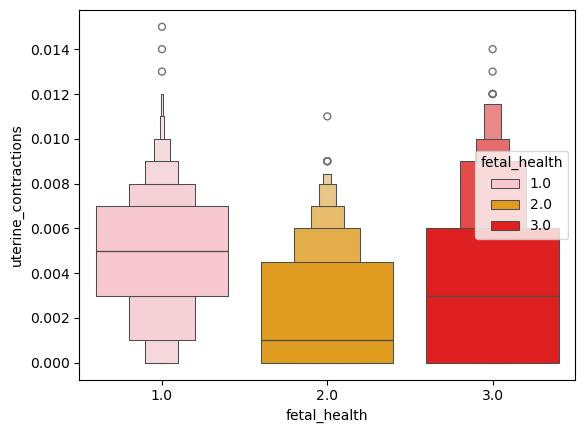

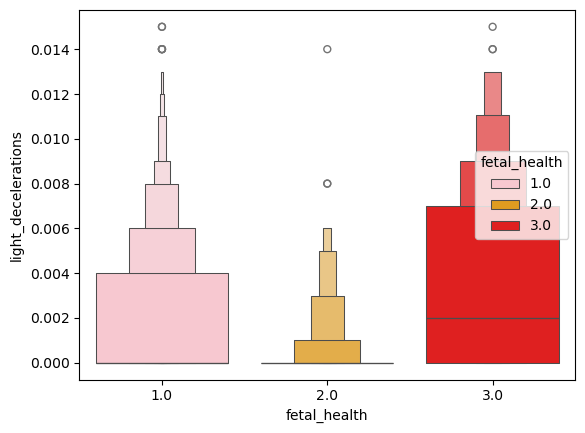

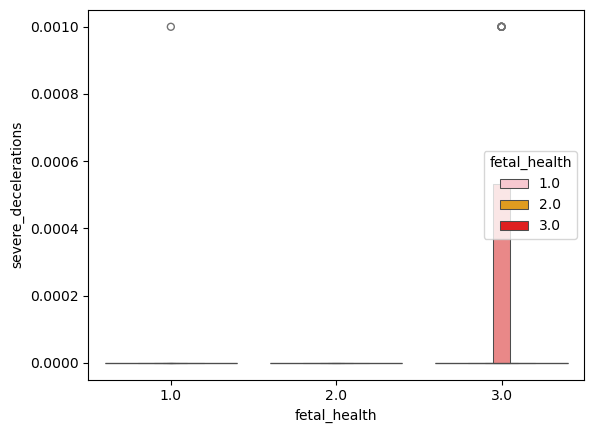

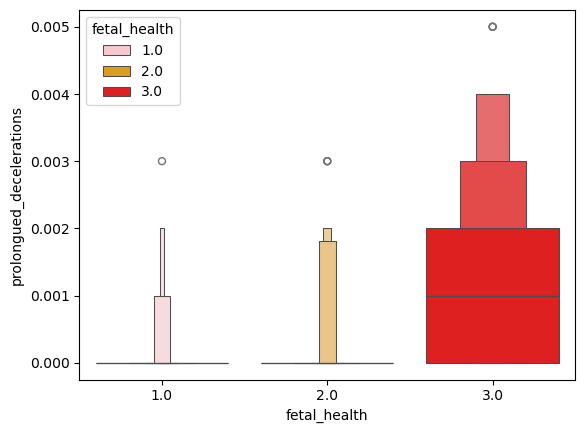

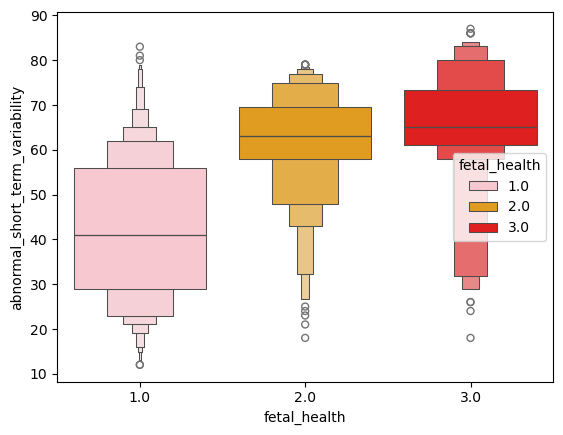

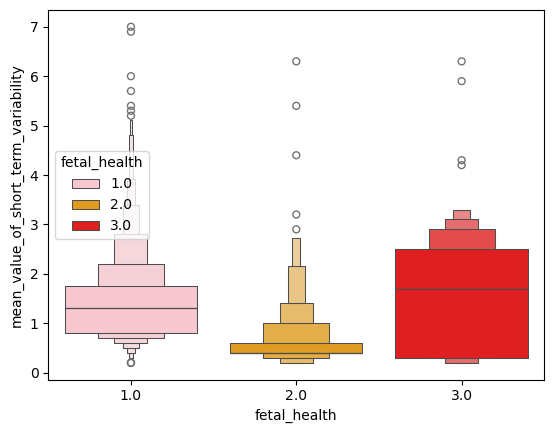

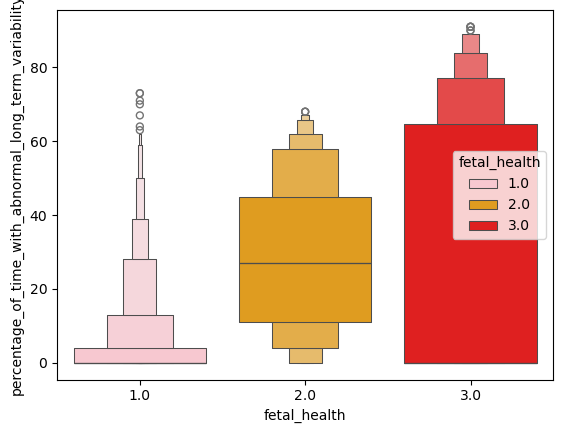

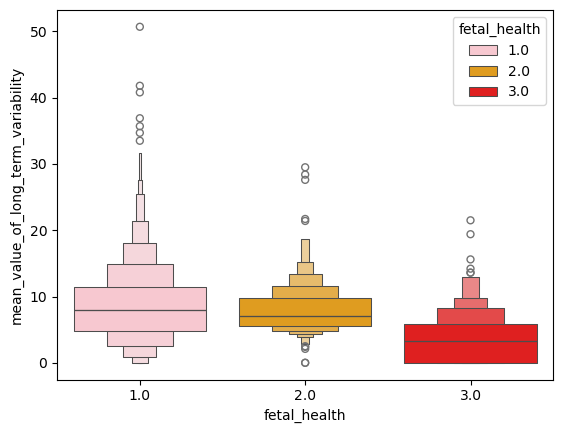

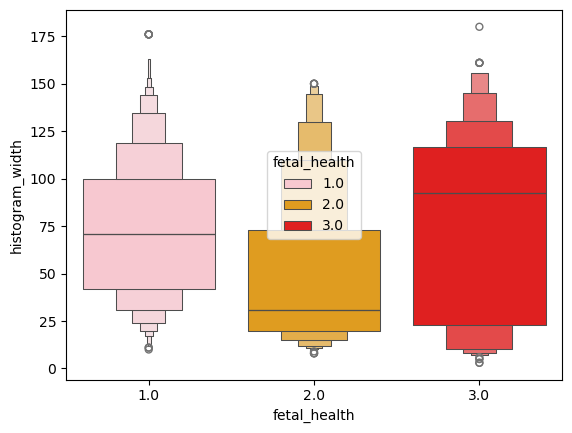

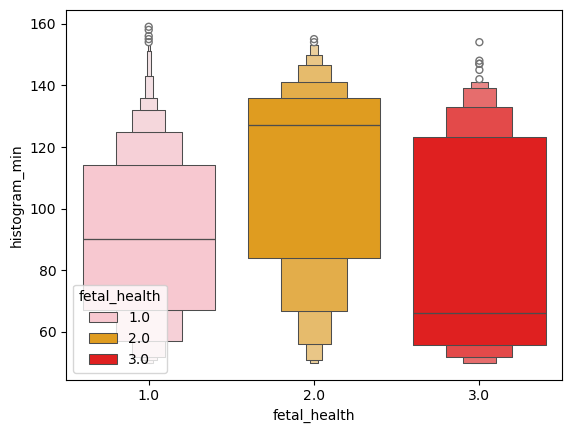

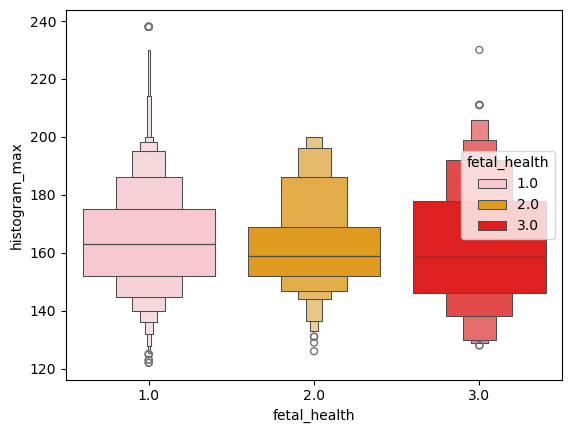

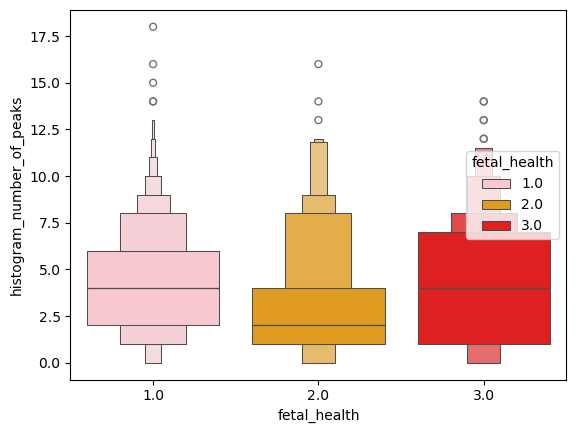

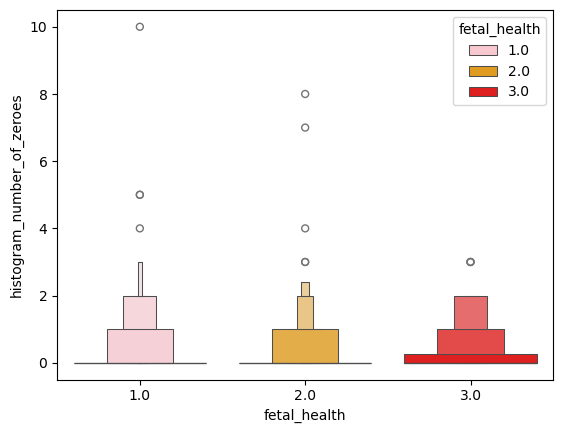

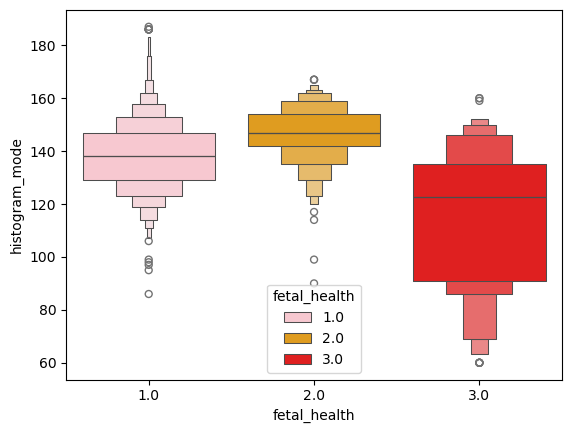

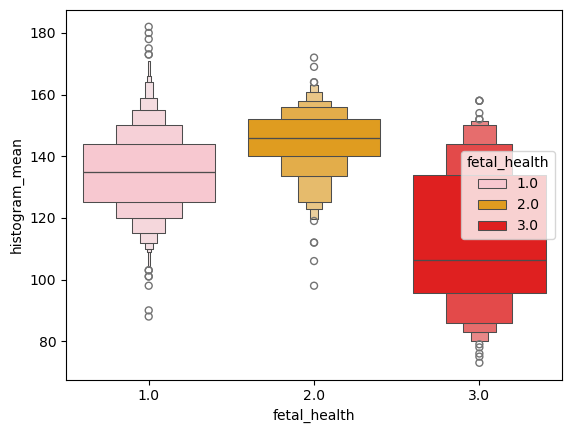

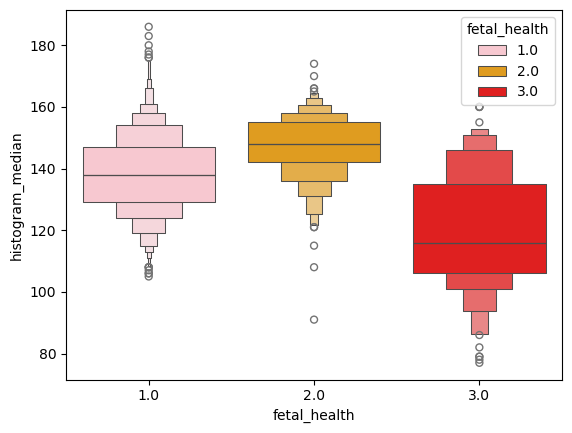

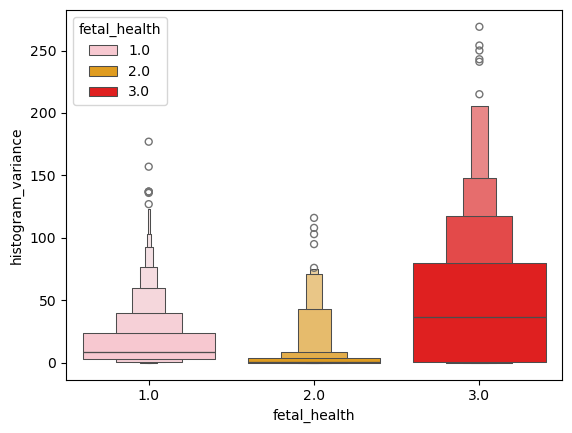

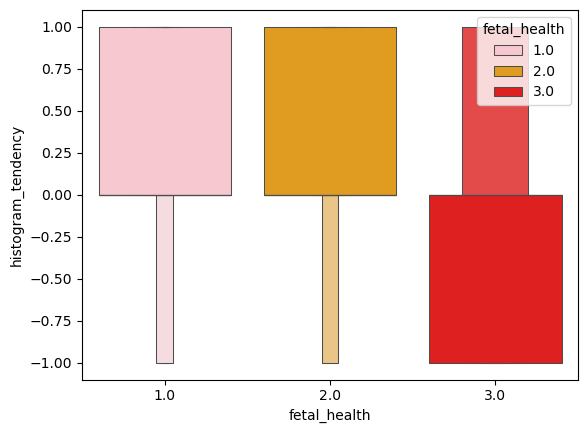

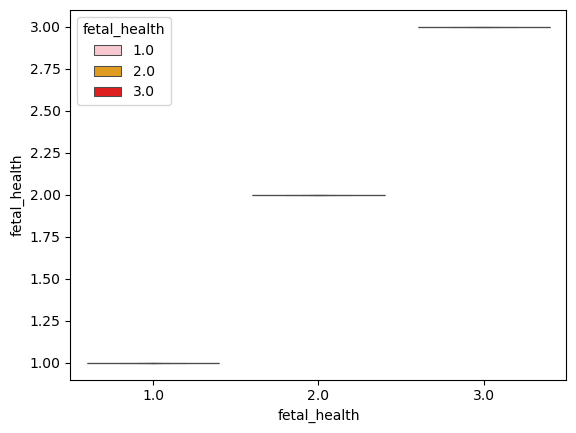

In [10]:
cols = FetalHealth.columns
for i in cols:
    sns.boxenplot(x=FetalHealth["fetal_health"], y=FetalHealth[i], palette=colours, hue = FetalHealth["fetal_health"])
    plt.show()

C:\Users\Santhosh\AppData\Local\Temp\ipykernel_17484\489257876.py:3: UserWarning: 
The palette list has fewer values (5) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = FetalHealth,palette = shades)


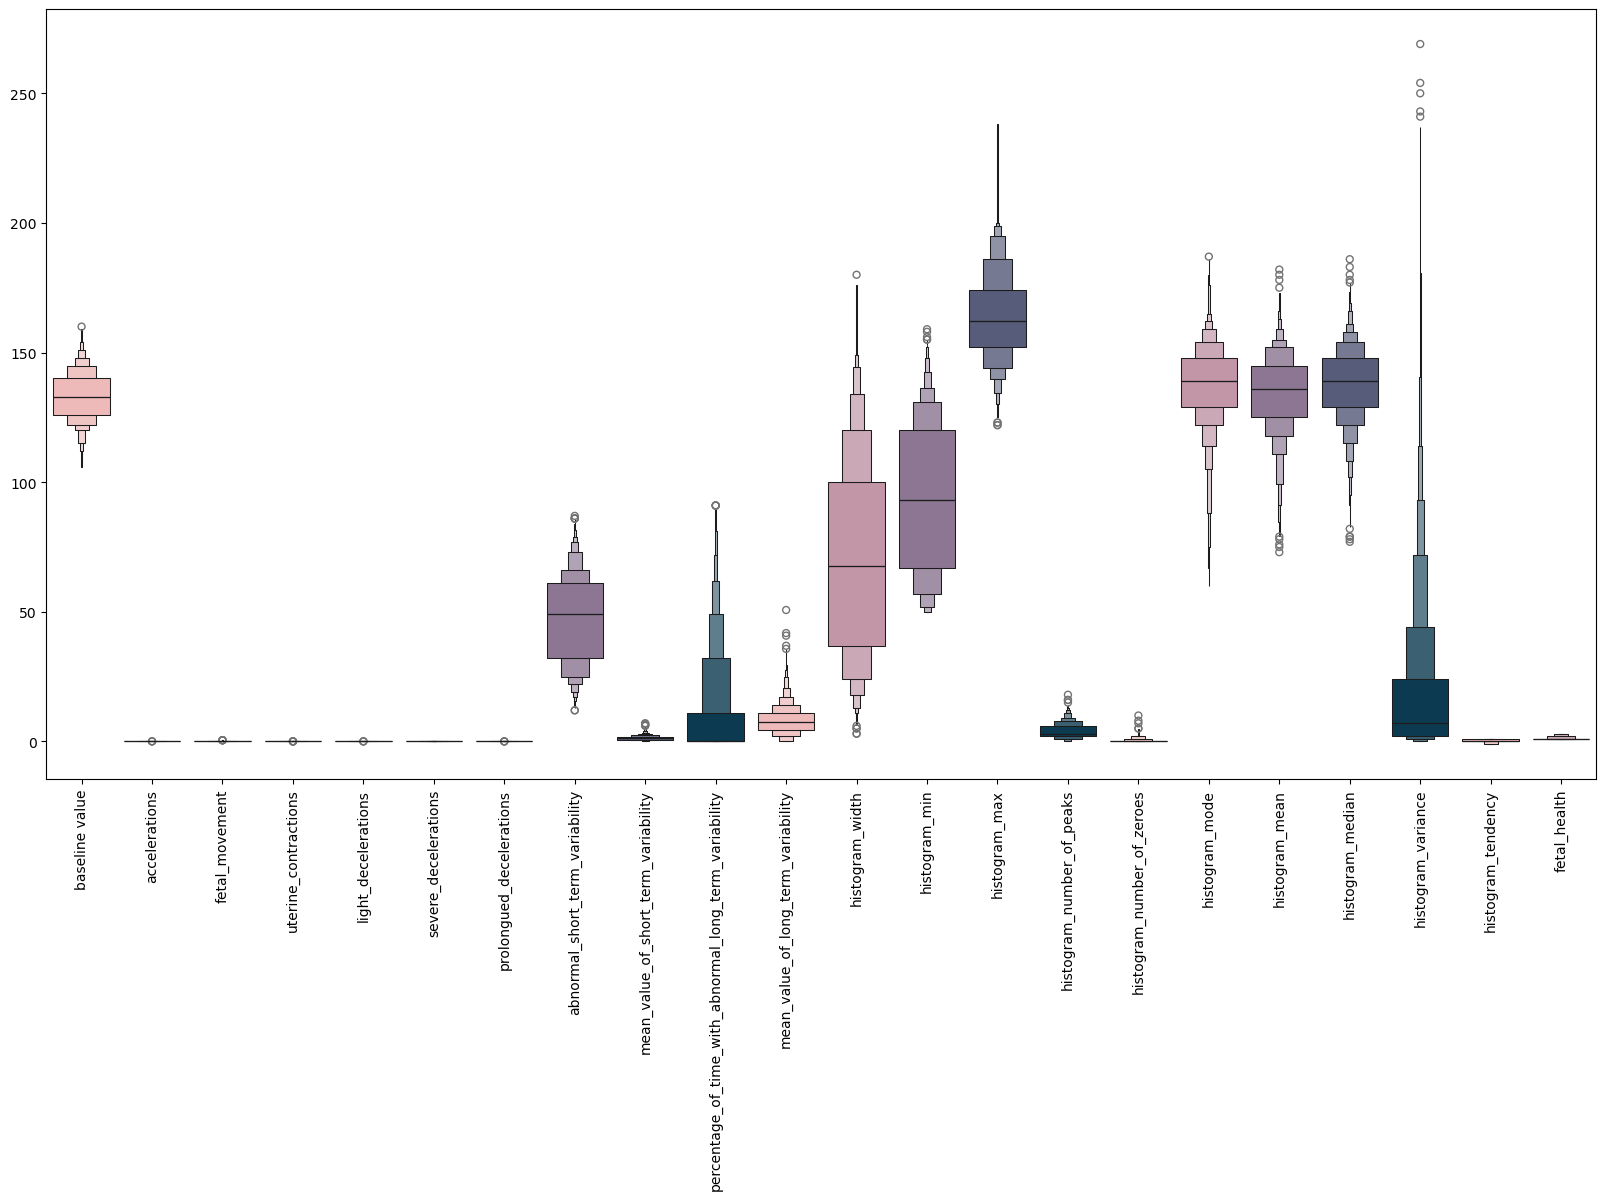

In [11]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = FetalHealth,palette = shades)
plt.xticks(rotation=90)
plt.show()

Data Preprocessing :

1. Scaling
2. X,y and test, train division

In [12]:
X = FetalHealth.drop(['fetal_health'], axis = 1)
y = FetalHealth['fetal_health']

In [13]:
col_names = list(X.columns)
# Three different scaling methods

#s_scaler = preprocessing.StandardScaler()
#s_scaler = preprocessing.MinMaxScaler()
#s_scaler = preprocessing.RobustScaler()
s_scaler = preprocessing.MaxAbsScaler()
#s_scaler = preprocessing.Normalizer()
#s_scaler = preprocessing.QuantileTransformer()

scaler_name = "Max Abs Scaler"
noscale = False
if(noscale):
    X_df = X
else:
    X_df= s_scaler.fit_transform(X)

X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,0.833149,0.061505,0.662500,0.787500,0.831250,0.875000,1.0
accelerations,2126.0,0.167277,0.203452,0.000000,0.000000,0.105263,0.315789,1.0
fetal_movement,2126.0,0.019710,0.097018,0.000000,0.000000,0.000000,0.006237,1.0
uterine_contractions,2126.0,0.291094,0.196405,0.000000,0.133333,0.266667,0.466667,1.0
light_decelerations,2126.0,0.125964,0.197347,0.000000,0.000000,0.000000,0.200000,1.0
severe_decelerations,2126.0,0.003293,0.057300,0.000000,0.000000,0.000000,0.000000,1.0
prolongued_decelerations,2126.0,0.031703,0.117990,0.000000,0.000000,0.000000,0.000000,1.0
abnormal_short_term_variability,2126.0,0.540116,0.197619,0.137931,0.367816,0.563218,0.701149,1.0
mean_value_of_short_term_variability,2126.0,0.190398,0.126177,0.028571,0.100000,0.171429,0.242857,1.0
percentage_of_time_with_abnormal_long_term_variability,2126.0,0.108205,0.202164,0.000000,0.000000,0.000000,0.120879,1.0


C:\Users\Santhosh\AppData\Local\Temp\ipykernel_17484\3870634562.py:3: UserWarning: 
The palette list has fewer values (5) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = X_df,palette = shades)


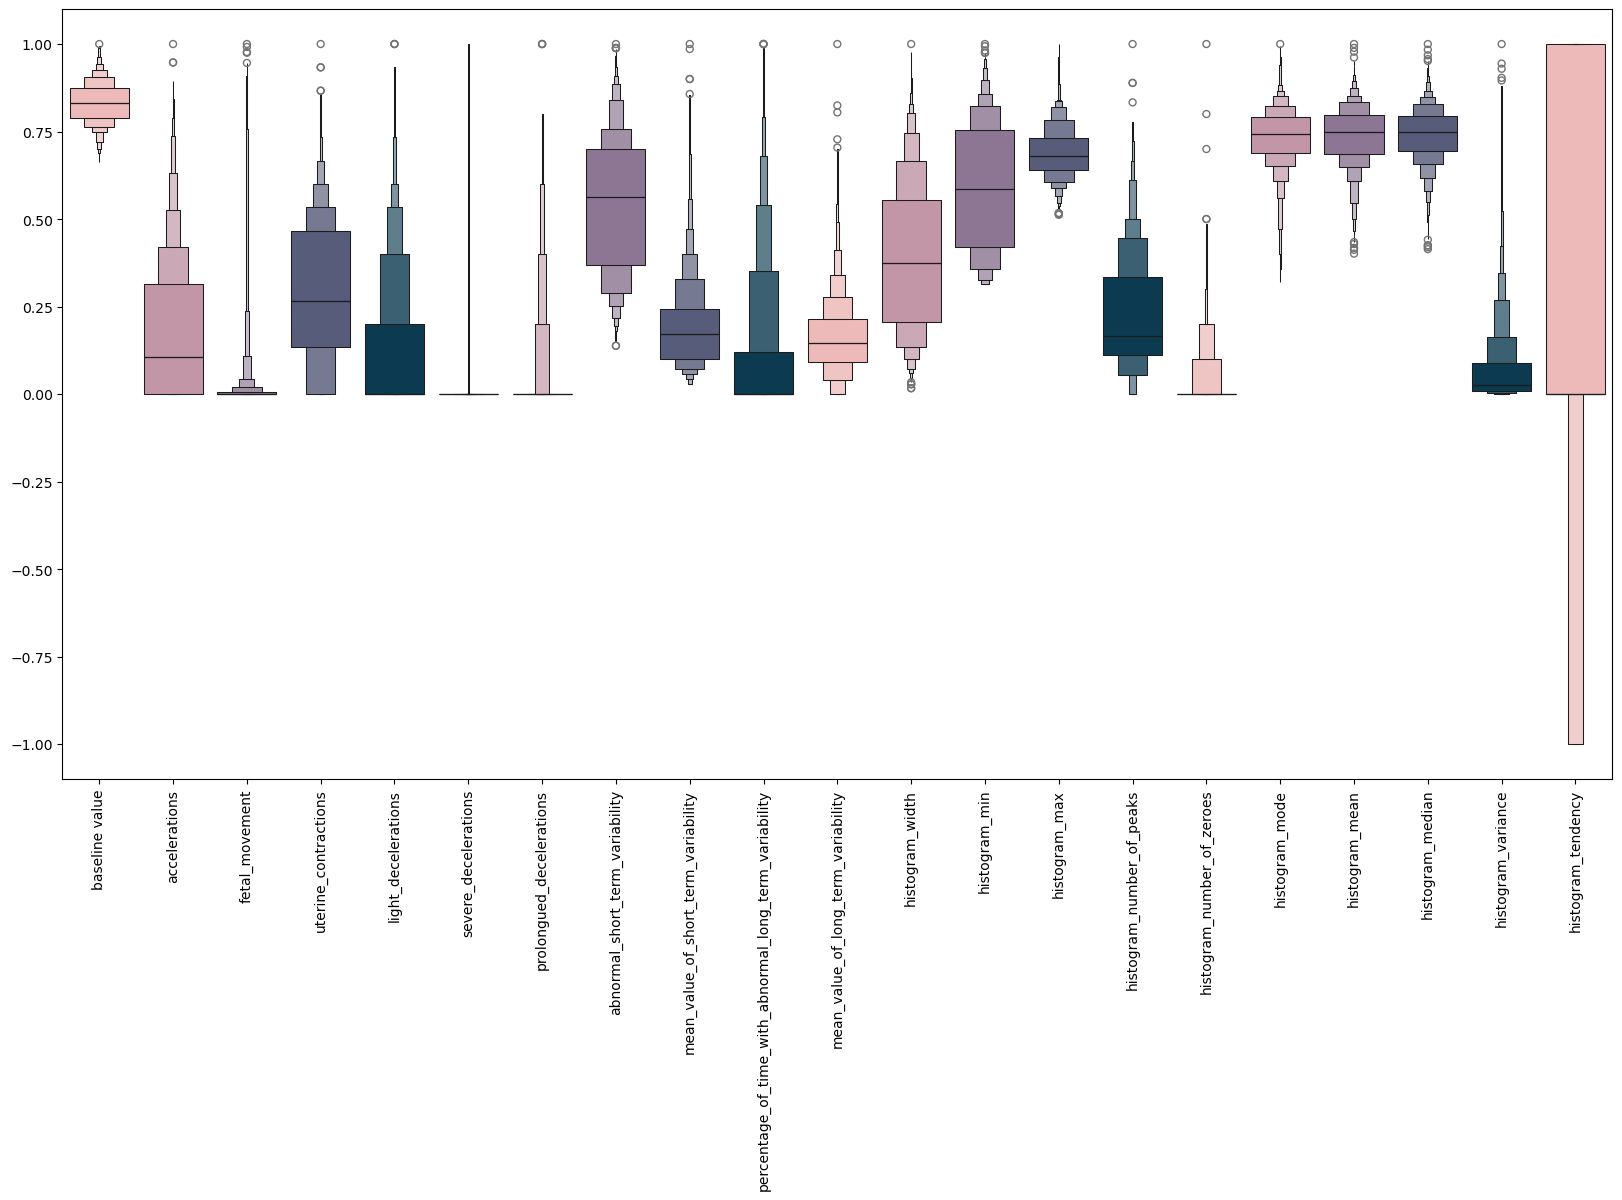

In [14]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [15]:
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [16]:
ros = RandomOverSampler(random_state=42)
X_train,y_train = ros.fit_resample(X_train,y_train)

In [17]:
classDistribution = pd.DataFrame()
classDistribution['fetal health'] = y_train.value_counts().index
classDistribution['frequency'] = y_train.value_counts().values

In [18]:
classDistribution

,fetal health,frequency
0,1.0,1159
1,3.0,1159
2,2.0,1159


C:\Users\Santhosh\AppData\Local\Temp\ipykernel_17484\3264911670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = classDistribution, x = "fetal health", y = "frequency",palette = colours)


Text(0.5, 1.0, 'Class counts of training data after oversampling')

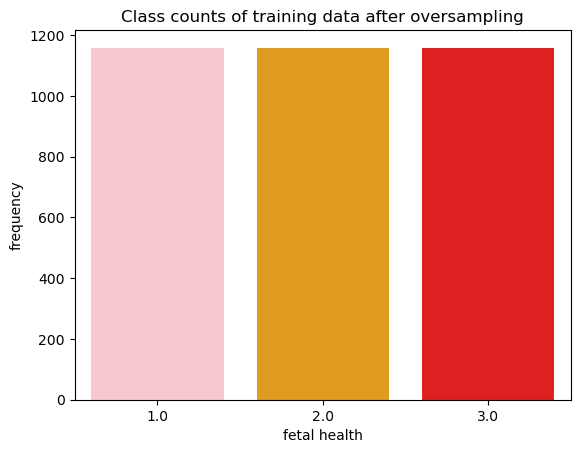

In [19]:
colours = ["pink","orange", "red"]
sns.barplot(data = classDistribution, x = "fetal health", y = "frequency",palette = colours)
plt.title("Class counts of training data after oversampling")

<Axes: ylabel='fetal_health'>

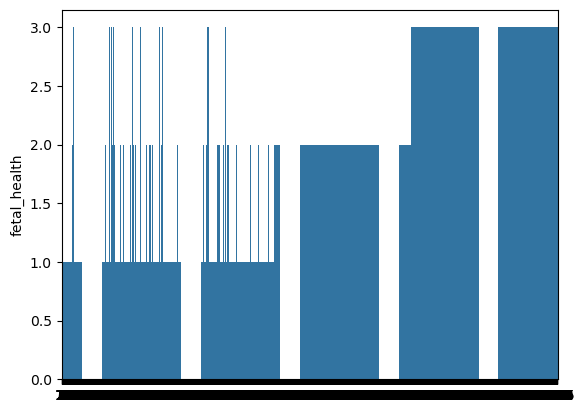

In [20]:
sns.barplot(data = y_train)

In [21]:
X_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.81875,0.421053,0.000000,0.133333,0.066667,0.0,0.0,0.620690,0.214286,0.000000,...,0.477778,0.522013,0.710084,0.388889,0.0,0.807487,0.780220,0.790323,0.081784,1.0
1,0.88750,0.000000,0.000000,0.266667,0.000000,0.0,0.0,0.505747,0.114286,0.010989,...,0.177778,0.792453,0.663866,0.055556,0.0,0.775401,0.802198,0.790323,0.007435,0.0
2,0.85625,0.105263,0.000000,0.466667,0.400000,0.0,0.0,0.310345,0.228571,0.000000,...,0.450000,0.540881,0.701681,0.111111,0.0,0.770053,0.747253,0.758065,0.085502,1.0
3,0.86250,0.000000,0.018711,0.133333,0.133333,0.0,0.0,0.632184,0.100000,0.000000,...,0.266667,0.647799,0.634454,0.222222,0.0,0.770053,0.769231,0.768817,0.018587,1.0
4,0.80625,0.105263,0.027027,0.000000,0.000000,0.0,0.0,0.540230,0.128571,0.000000,...,0.577778,0.327044,0.655462,0.333333,0.0,0.711230,0.730769,0.720430,0.014870,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,0.75000,0.000000,0.000000,0.333333,0.666667,0.0,0.4,0.735632,0.242857,0.000000,...,0.616667,0.396226,0.731092,0.555556,0.1,0.459893,0.505495,0.548387,0.159851,-1.0
3473,0.77500,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.988506,0.057143,0.153846,...,0.133333,0.767296,0.613445,0.055556,0.0,0.673797,0.692308,0.682796,0.000000,-1.0
3474,0.81250,0.052632,0.002079,0.800000,0.666667,0.0,0.2,0.712644,0.314286,0.000000,...,0.894444,0.314465,0.886555,0.500000,0.0,0.320856,0.489011,0.607527,0.929368,0.0
3475,0.92500,0.000000,0.031185,0.000000,0.000000,0.0,0.0,0.850575,0.028571,0.857143,...,0.077778,0.874214,0.642857,0.000000,0.0,0.791444,0.813187,0.801075,0.000000,0.0


In [22]:
y_train

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3472    3.0
3473    3.0
3474    3.0
3475    3.0
3476    3.0
Name: fetal_health, Length: 3477, dtype: float64

In [23]:
performanceMeasuresDF = pd.DataFrame(columns=['Classifier Model', 'Accuracy','F1-Score','Recall','Precision','Jaccard-Score','Kappa-Score'])

In [24]:
lr = LogisticRegression(max_iter = 100000)
result = %timeit -o lr.fit(X=X_train, y=y_train) 
lr.fit(X = X_train, y = y_train)
print("Logistic Regression : ")
measures = performance_measures("Logistic Regression", lr, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
#performanceMeasuresDF = pd.concat((performanceMeasuresDF, pd.DataFrame(measures)))
exec_time = result.average

412 ms ± 211 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Logistic Regression : 
Accuracy : 0.8072100313479624
F1 : 0.8257460161824235
Recall : 0.8072100313479624
Precision : 0.8758031333973494
Jaccard : 0.7161734637623188
Kappa : 0.5794330916282135


In [25]:
svmlinear = SVC(kernel = 'linear')
result = %timeit -o svmlinear.fit(X=X_train, y = y_train)
svmlinear.fit(X=X_train, y = y_train)
print("SVM Linear : ")
measures = performance_measures("Support Vector Machine(Linear)", svmlinear, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

989 ms ± 182 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SVM Linear : 
Accuracy : 0.8040752351097179
F1 : 0.8243202453395152
Recall : 0.8040752351097179
Precision : 0.8791723448423613
Jaccard : 0.7149913177632983
Kappa : 0.577205687444997


In [26]:
svmrbf = SVC(kernel = 'rbf')
result = %timeit -o svmrbf.fit(X=X_train, y = y_train)
svmrbf.fit(X=X_train, y = y_train)
print("SVM RBF : ")
measures = performance_measures("Support Vector Machine(RBF)", svmrbf, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

965 ms ± 188 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SVM RBF : 
Accuracy : 0.835423197492163
F1 : 0.8513526407483436
Recall : 0.835423197492163
Precision : 0.8957851784941423
Jaccard : 0.7525110906912675
Kappa : 0.634266184772283


Two variants which haven't been tried before

In [27]:
svmpoly = SVC(kernel = 'poly')
result = %timeit -o svmpoly.fit(X=X_train, y = y_train)
svmpoly.fit(X=X_train, y = y_train)
print("SVM Poly : ")
measures = performance_measures("Support Vector Machine(Poly)",svmpoly, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

731 ms ± 98.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SVM Poly : 
Accuracy : 0.8652037617554859
F1 : 0.8766645765199722
Recall : 0.8652037617554859
Precision : 0.9092756357693669
Jaccard : 0.7890222579335096
Kappa : 0.688791079146484


In [28]:
svmsigmoid = SVC(kernel = 'sigmoid')
result = %timeit -o svmsigmoid.fit(X=X_train, y = y_train)
svmsigmoid.fit(X=X_train, y = y_train)
print("SVM Sigmoid : ")
measures = performance_measures("Support Vector Machine(Sigmoid)",svmsigmoid, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

4.59 s ± 1.11 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
SVM Sigmoid : 
Accuracy : 0.33072100313479624
F1 : 0.39086132189977624
Recall : 0.33072100313479624
Precision : 0.7134316478973943
Jaccard : 0.2464723348738124
Kappa : 0.06368660553485761


In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
result = %timeit -o knn.fit(X=X_train, y = y_train) 
knn.fit(X=X_train, y = y_train)
print("K-Nearest Neighbors : ")
measures = performance_measures("K-Nearest Neighbors",knn, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

11.9 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
K-Nearest Neighbors : 
Accuracy : 0.8589341692789969
F1 : 0.8691582985873004
Recall : 0.8589341692789969
Precision : 0.894371680909234
Jaccard : 0.7788140586930471
Kappa : 0.6673155808941111


In [30]:
gnb = GaussianNB()
result = %timeit -o gnb.fit(X_train, y_train)
gnb.fit(X_train, y_train)
print("Naive Bayes : ")
measures = performance_measures("Naive Bayes",gnb, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

23.6 ms ± 6.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Naive Bayes : 
Accuracy : 0.700626959247649
F1 : 0.7340940320037332
Recall : 0.700626959247649
Precision : 0.8593228544256611
Jaccard : 0.590251992841655
Kappa : 0.43452314660132907


In [31]:
dt = DecisionTreeClassifier()
result = %timeit -o dt.fit(X_train, y_train)
dt.fit(X_train, y_train)
print("Decision Trees : ")
measures = performance_measures("Decision Tree",dt, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

96.4 ms ± 20 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Decision Trees : 
Accuracy : 0.9184952978056427
F1 : 0.9184035521951457
Recall : 0.9184952978056427
Precision : 0.9187463233973812
Jaccard : 0.8545627722438373
Kappa : 0.7791740994169174


In [32]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
result = %timeit -o rfc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
print("Random Forest Classifier : ")
measures = performance_measures("Random Forest",rfc, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

1.81 s ± 234 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Random Forest Classifier : 
Accuracy : 0.9373040752351097
F1 : 0.9370986234731953
Recall : 0.9373040752351097
Precision : 0.9372451855921462
Jaccard : 0.8863763572248146
Kappa : 0.829167391857336


In [33]:
abc = AdaBoostClassifier(n_estimators = 100, random_state = 42)
result = %timeit -o abc.fit(X_train, y_train)
abc.fit(X_train, y_train)
print("Ada Boost Classifier : ")
measures = performance_measures("Ada Boost",abc, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

c:\Users\Santhosh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Santhosh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Santhosh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Santhosh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


1.67 s ± 772 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


c:\Users\Santhosh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ada Boost Classifier : 
Accuracy : 0.8871473354231975
F1 : 0.8922203194307323
Recall : 0.8871473354231975
Precision : 0.9037482268486758
Jaccard : 0.8123084124727266
Kappa : 0.7184448762189628


In [34]:
gbc = GradientBoostingClassifier(n_estimators = 100, random_state = 42, learning_rate = 1.0, max_depth = 1)
result = %timeit -o gbc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
print("Gradient Boost Classifier : ")
measures = performance_measures("Gradient Boost",gbc, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

2.5 s ± 769 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Gradient Boost Classifier : 
Accuracy : 0.8824451410658307
F1 : 0.889478732362703
Recall : 0.8824451410658307
Precision : 0.9123061851569174
Jaccard : 0.8067182439299724
Kappa : 0.7229556034183284


In [35]:
performanceMeasuresDF

,Classifier Model,Accuracy,F1-Score,Recall,Precision,Jaccard-Score,Kappa-Score
0,Logistic Regression,0.807210,0.825746,0.807210,0.875803,0.716173,0.579433
1,Support Vector Machine(Linear),0.804075,0.824320,0.804075,0.879172,0.714991,0.577206
2,Support Vector Machine(RBF),0.835423,0.851353,0.835423,0.895785,0.752511,0.634266
3,Support Vector Machine(Poly),0.865204,0.876665,0.865204,0.909276,0.789022,0.688791
4,Support Vector Machine(Sigmoid),0.330721,0.390861,0.330721,0.713432,0.246472,0.063687
5,K-Nearest Neighbors,0.858934,0.869158,0.858934,0.894372,0.778814,0.667316
6,Naive Bayes,0.700627,0.734094,0.700627,0.859323,0.590252,0.434523
7,Decision Tree,0.918495,0.918404,0.918495,0.918746,0.854563,0.779174
8,Random Forest,0.937304,0.937099,0.937304,0.937245,0.886376,0.829167
9,Ada Boost,0.887147,0.892220,0.887147,0.903748,0.812308,0.718445


In [36]:
performanceMeasuresDF["Weighted_Score"] = performanceMeasuresDF["Accuracy"] + performanceMeasuresDF["F1-Score"] + performanceMeasuresDF["Recall"] + performanceMeasuresDF["Precision"] + performanceMeasuresDF["Jaccard-Score"] + performanceMeasuresDF["Kappa-Score"]

In [37]:
performanceTable = performanceMeasuresDF.sort_values(by = "Weighted_Score",ascending= False)

In [38]:
#performanceTable.to_excel("results\\"+ scaler_name + '.xlsx', index = False)

In [39]:
print(exec_time)

#with open(r"results/" + scaler_name + r" Timings.txt", "+a") as file:
#    file.write(str(exec_time) + "\n")

13.80119607571978


In [40]:
import winsound
freq = 1000
dur = 2000
winsound.Beep(freq,dur)
winsound.Beep(freq + 100,dur)

In [41]:
#%reset